# Previsão de Preço de Imóveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Gerando o dataframe para começar a análise

In [2]:
df = pd.read_csv('dataset/Housing.csv')

In [3]:
df.shape

(545, 13)

## Análise Exploratória de Dados (EDA)
#### Exibe informações detalhadas sobre o DataFrame, incluindo tipos de dados e valores nulos

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Separa e exibe as colunas numéricas e categóricas do DataFrame

In [5]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
print("numeric:",numerical_data.columns)

categorical_data = df.select_dtypes(include=['object'])
print("objects:",categorical_data.columns)

numeric: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
objects: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.duplicated().sum()


0

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# valores unicos
print("valores unicos:")
print(df.nunique())

valores unicos:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


#### Agrupa e exibe a contagem de ocorrências para variáveis categóricas específicas

In [14]:
print("mainroad:",df.groupby(['mainroad']).size())
print("basement:",df.groupby(['basement']).size())
print("hotwaterheating:",df.groupby(['hotwaterheating']).size())
print("airconditioning:",df.groupby(['airconditioning']).size())
print("prefarea:",df.groupby(['prefarea']).size())
print("furnishingstatus:",df.groupby(['furnishingstatus']).size())
print("guestroom:",df.groupby(['guestroom']).size())
print("bedrooms:",df.groupby(['bedrooms']).size())

mainroad: mainroad
no      77
yes    468
dtype: int64
basement: basement
no     354
yes    191
dtype: int64
hotwaterheating: hotwaterheating
no     520
yes     25
dtype: int64
airconditioning: airconditioning
no     373
yes    172
dtype: int64
prefarea: prefarea
no     417
yes    128
dtype: int64
furnishingstatus: furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
dtype: int64
guestroom: guestroom
no     448
yes     97
dtype: int64
bedrooms: bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
dtype: int64


In [15]:
count_bedroom=df['bedrooms'].value_counts()
count_bathroom=df['bathrooms'].value_counts()
count_stories=df['stories'].value_counts()
count_mainroad=df['mainroad'].value_counts()
count_guestroom=df['guestroom'].value_counts()
count_basement=df['basement'].value_counts()
count_airconditioning=df['airconditioning'].value_counts()
count_furnishingstatus=df['furnishingstatus'].value_counts()
print(count_bedroom,count_bathroom, count_stories,count_mainroad,count_guestroom,count_basement,count_airconditioning,count_furnishingstatus)


bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64 bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64 stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64 mainroad
yes    468
no      77
Name: count, dtype: int64 guestroom
no     448
yes     97
Name: count, dtype: int64 basement
no     354
yes    191
Name: count, dtype: int64 airconditioning
no     373
yes    172
Name: count, dtype: int64 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


### Visualização de Dados

/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/2837721147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='mako')


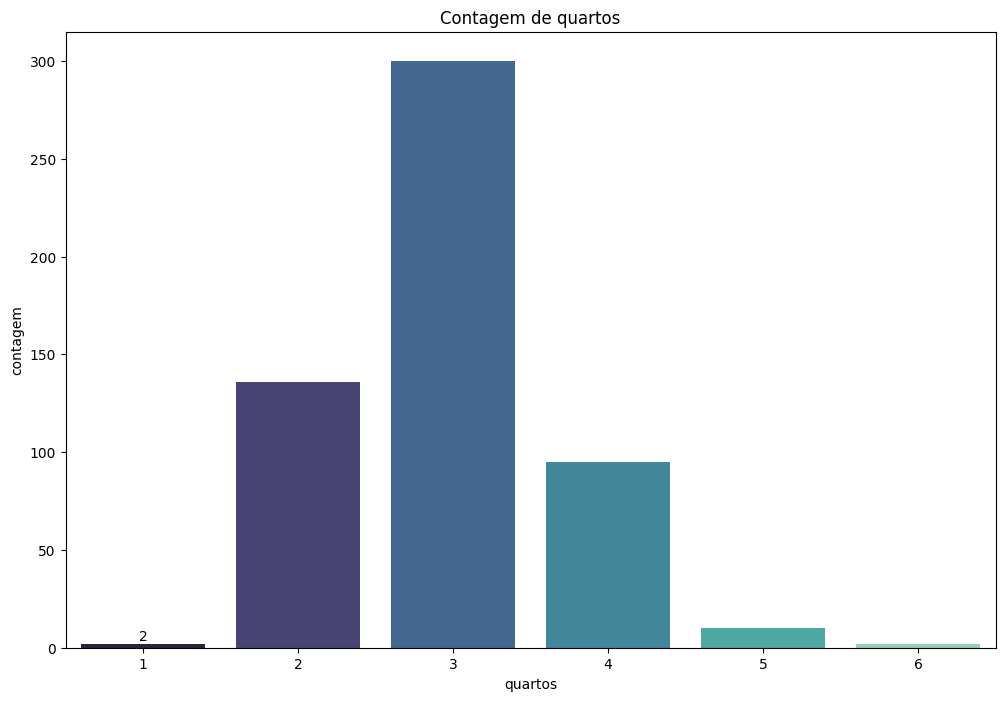

<Figure size 1200x800 with 0 Axes>

In [16]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='mako')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de quartos')
plt.xlabel('quartos')
plt.ylabel('contagem')
plt.savefig("figures/contagem_quartos.png")
plt.figure(figsize=(12,8))
plt.show()

/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/3802585542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_airconditioning.index,y=count_airconditioning.values,palette='mako')


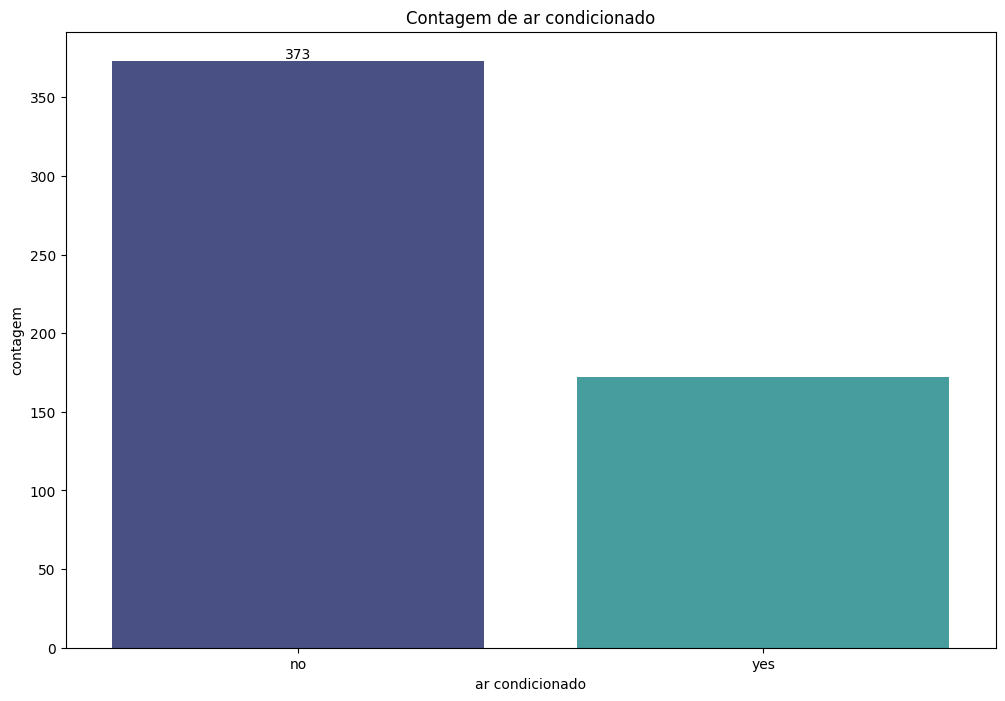

<Figure size 1200x800 with 0 Axes>

In [17]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_airconditioning.index,y=count_airconditioning.values,palette='mako')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de ar condicionado')
plt.xlabel('ar condicionado')
plt.ylabel('contagem')
plt.savefig("figures/contagem_ar_condicionado.png")
plt.figure(figsize=(12,8))
plt.show()

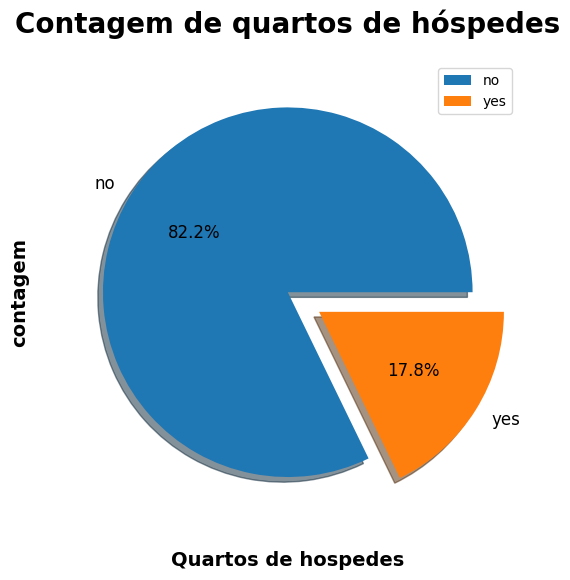

<Figure size 1200x800 with 0 Axes>

In [18]:
plt.figure(figsize = (20, 6))
explode = (0,0.2)
count_guestroom.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%',shadow = True)
plt.title('Contagem de quartos de hóspedes', weight = "bold", color = "#000000", fontsize = 20, pad = 20)
plt.xlabel('Quartos de hospedes', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('contagem', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_guestroom.index, loc = "best")
plt.savefig("figures/contagem_quartos_hospedes.png")
plt.figure(figsize=(12,8))
plt.show()

/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/2197604638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_furnishingstatus.index,y=count_furnishingstatus.values,palette='mako')


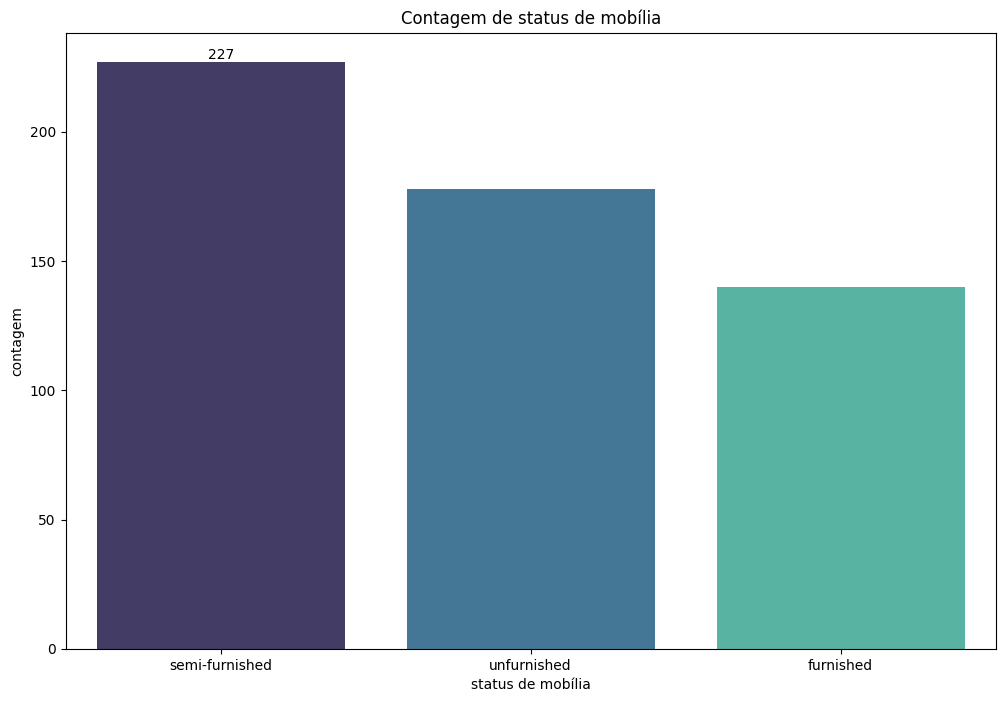

<Figure size 1200x800 with 0 Axes>

In [19]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_furnishingstatus.index,y=count_furnishingstatus.values,palette='mako')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de status de mobília')
plt.xlabel('status de mobília')
plt.ylabel('contagem')
plt.savefig("figures/contagem_status_mobilia.png")
plt.figure(figsize=(12,8))
plt.show()

### Graficos em uma so imagem

/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/3412989254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='mako')
/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/3412989254.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_airconditioning.index,y=count_airconditioning.values,palette='mako')
/var/folders/46/19yvtpkn6093lmz1h72vd7jw0000gn/T/ipykernel_27702/3412989254.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_furnish

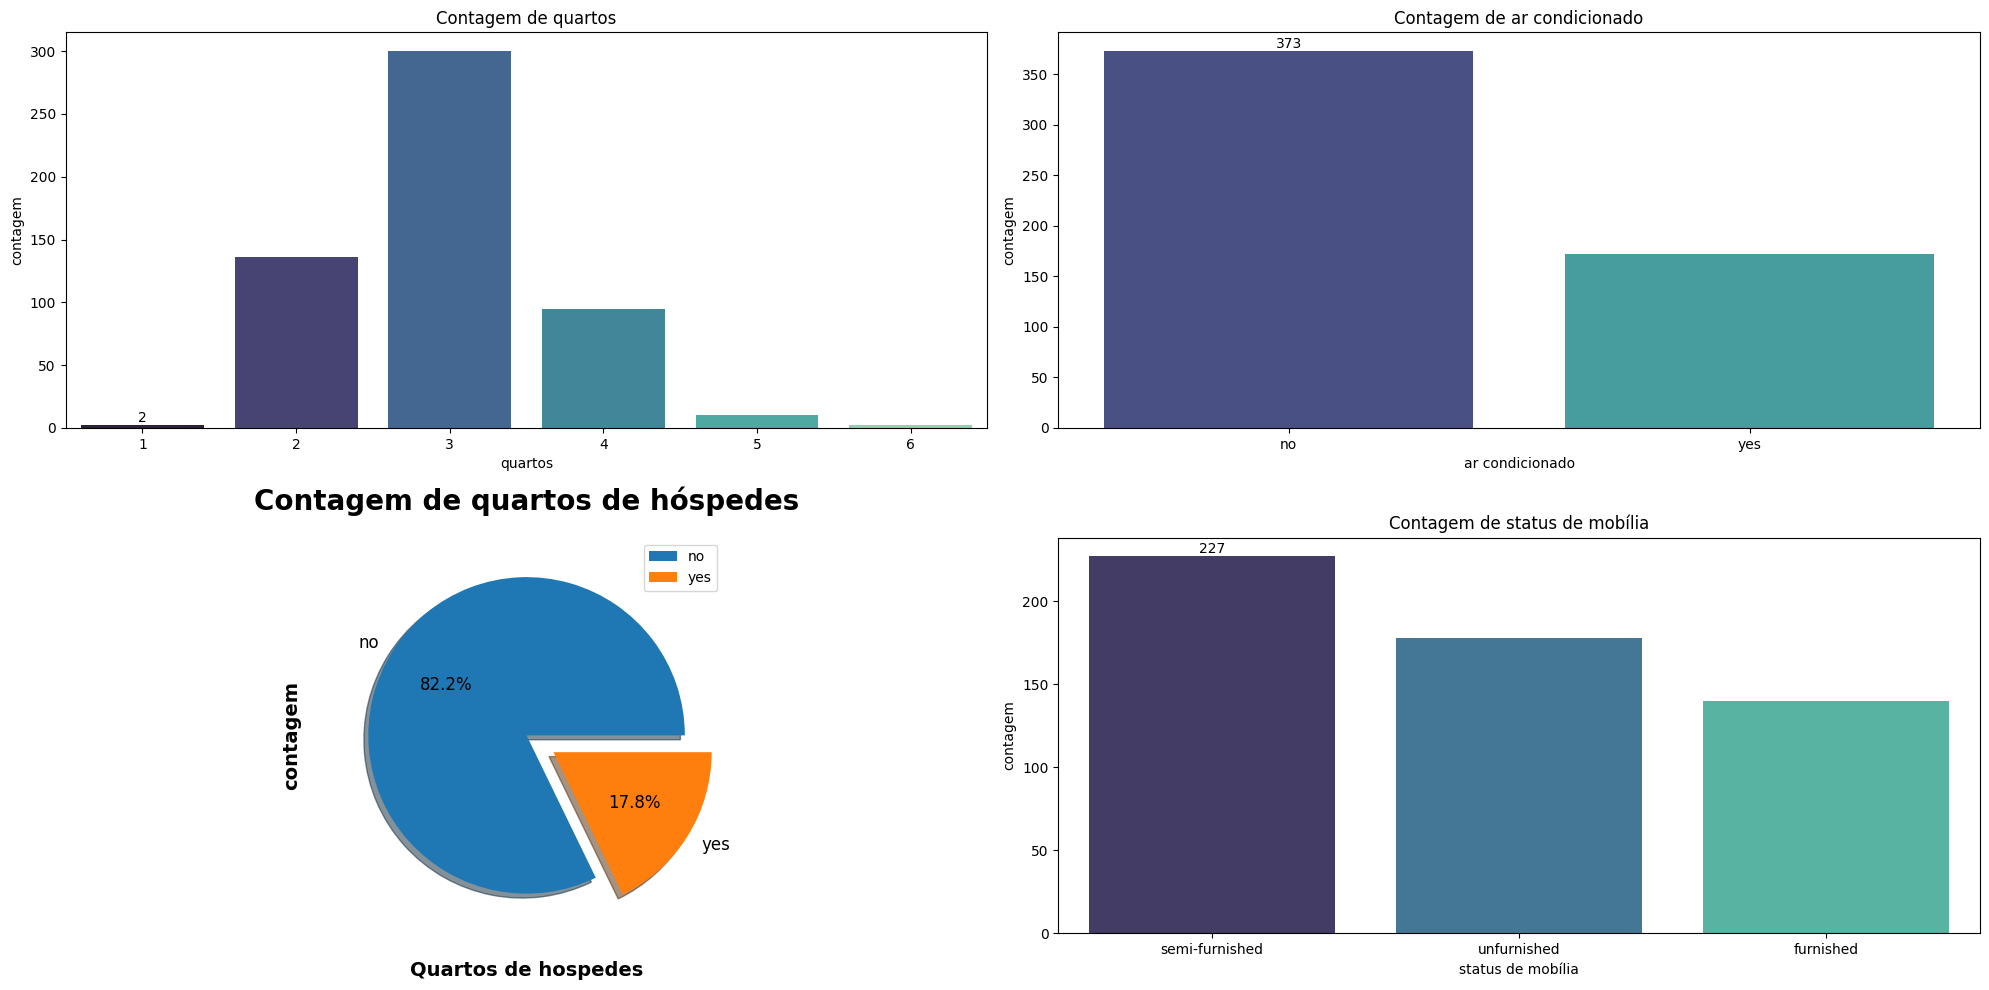

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='mako') 
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de quartos')
plt.xlabel('quartos')
plt.ylabel('contagem')  
plt.subplot(2, 2, 2)
ax=sns.barplot(x=count_airconditioning.index,y=count_airconditioning.values,palette='mako')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de ar condicionado')
plt.xlabel('ar condicionado')
plt.ylabel('contagem')  
plt.subplot(2, 2, 3)
explode = (0,0.2)
count_guestroom.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%',shadow = True)      
plt.title('Contagem de quartos de hóspedes', weight = "bold", color = "#000000", fontsize = 20, pad = 20)
plt.xlabel('Quartos de hospedes', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('contagem', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_guestroom.index, loc = "best")
plt.subplot(2, 2, 4)
ax=sns.barplot(x=count_furnishingstatus.index,y=count_furnishingstatus.values,palette='mako')       
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Contagem de status de mobília')
plt.xlabel('status de mobília')
plt.ylabel('contagem') 
plt.savefig("figures/contagem_quartos_ar_condicionado_quartos_hospedes_status_mobilia.png") 
plt.tight_layout()
plt.show()

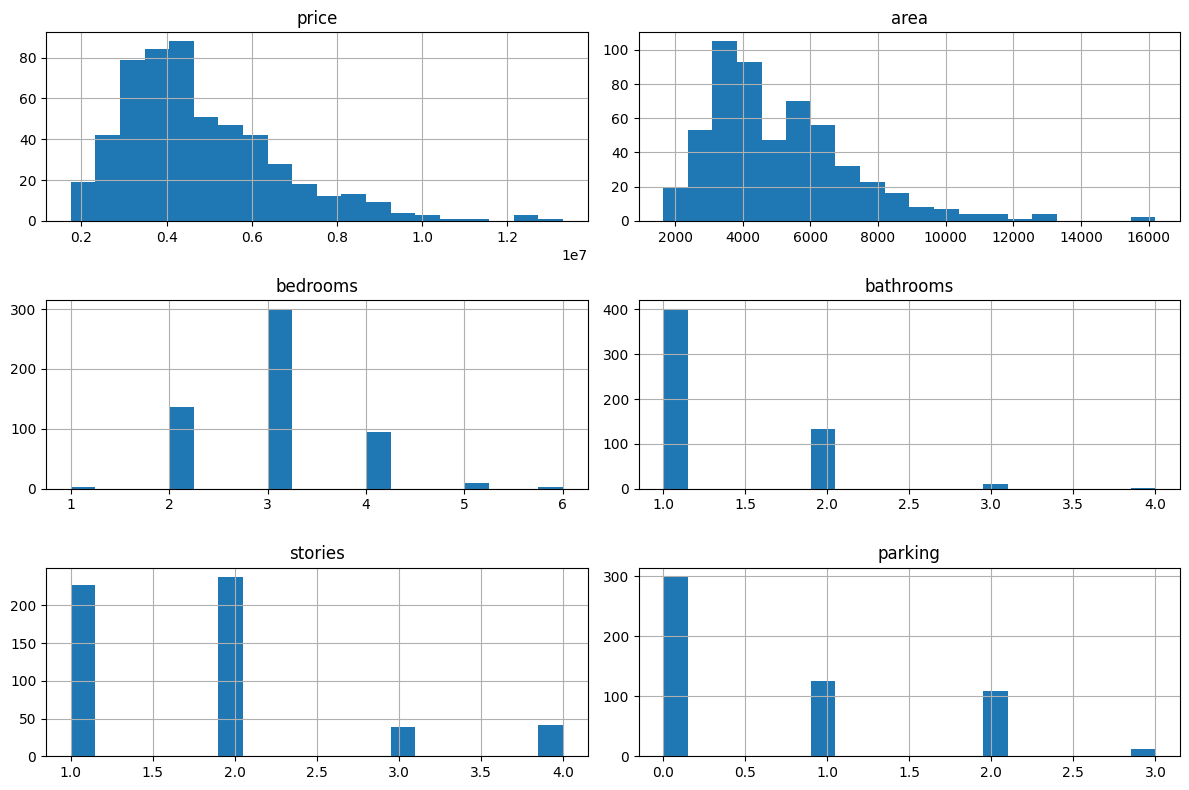

In [21]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numerical_data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='bathrooms', ylabel='count'>

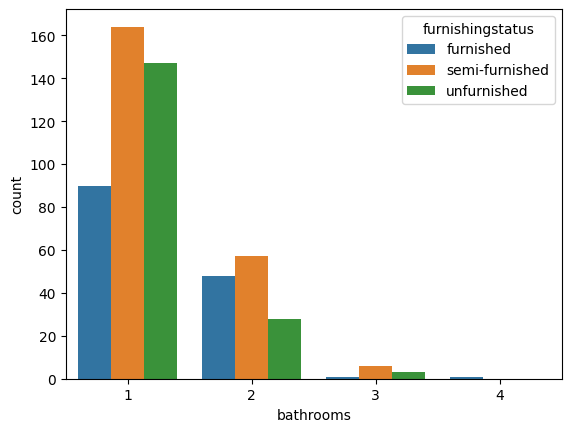

In [22]:
sns.countplot(df, x="bathrooms", hue="furnishingstatus")

In [23]:
categorical_data = df.select_dtypes(include=['object'])
for column in categorical_data.columns:
    print(f"\nDistribuição de {column}:")
    print(df[column].value_counts())


Distribuição de mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Distribuição de guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Distribuição de basement:
basement
no     354
yes    191
Name: count, dtype: int64

Distribuição de hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Distribuição de airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Distribuição de prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Distribuição de furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


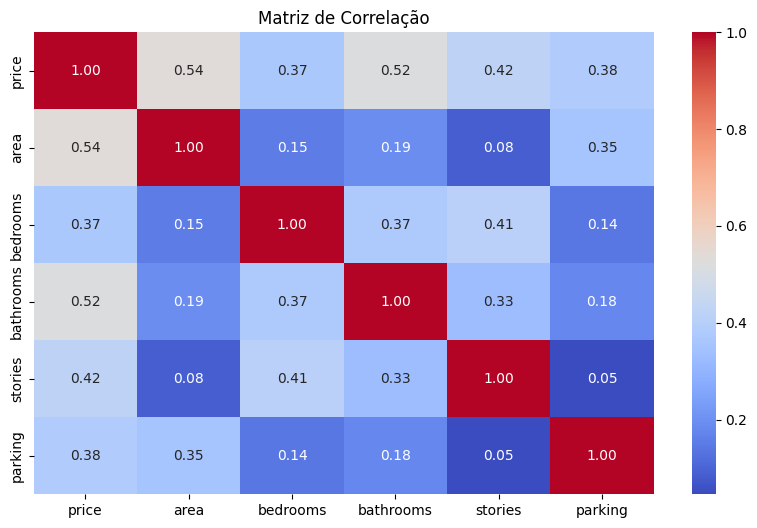

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

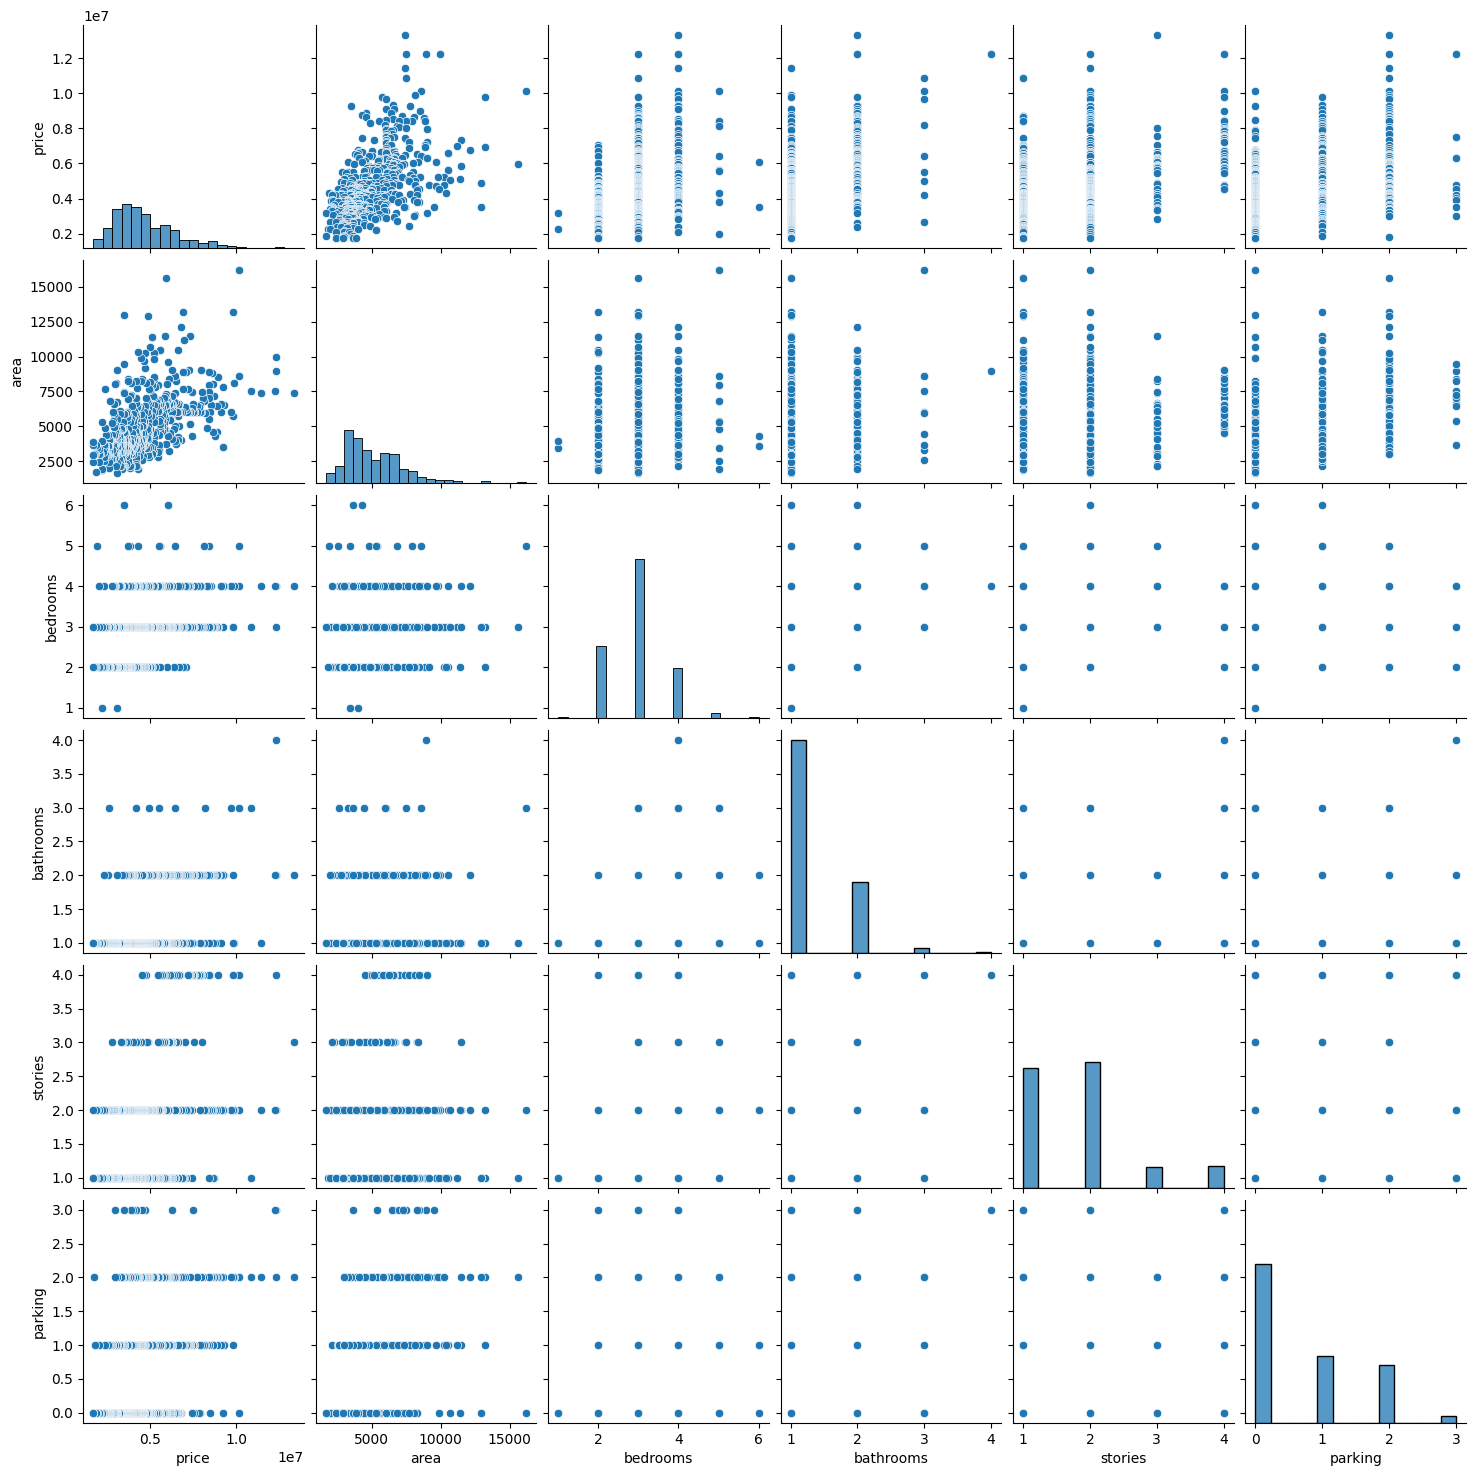

In [25]:
sns.pairplot(numerical_data)
plt.show()

## Engenharia de Atributos

### Removendo colunas desnecessárias

In [320]:
x=df.drop(columns=['price'])
y=df['price']

### Converte variáveis categóricas em valores numéricos usando LabelEncoder

In [321]:
le=LabelEncoder()
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])
df['prefarea']=le.fit_transform(df['prefarea'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['basement']=le.fit_transform(df['basement'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['mainroad']=le.fit_transform(df['mainroad'])
#df = df.replace("yes", 1)
#df = df.replace("no", 0)
#df = df.replace(['unfurnished', 'semi-furnished', 'furnished'], [0,1,2])

### Gera uma matriz de correlação atualizada com todas as variáveis (agora numéricas) e exibe como mapa de calor

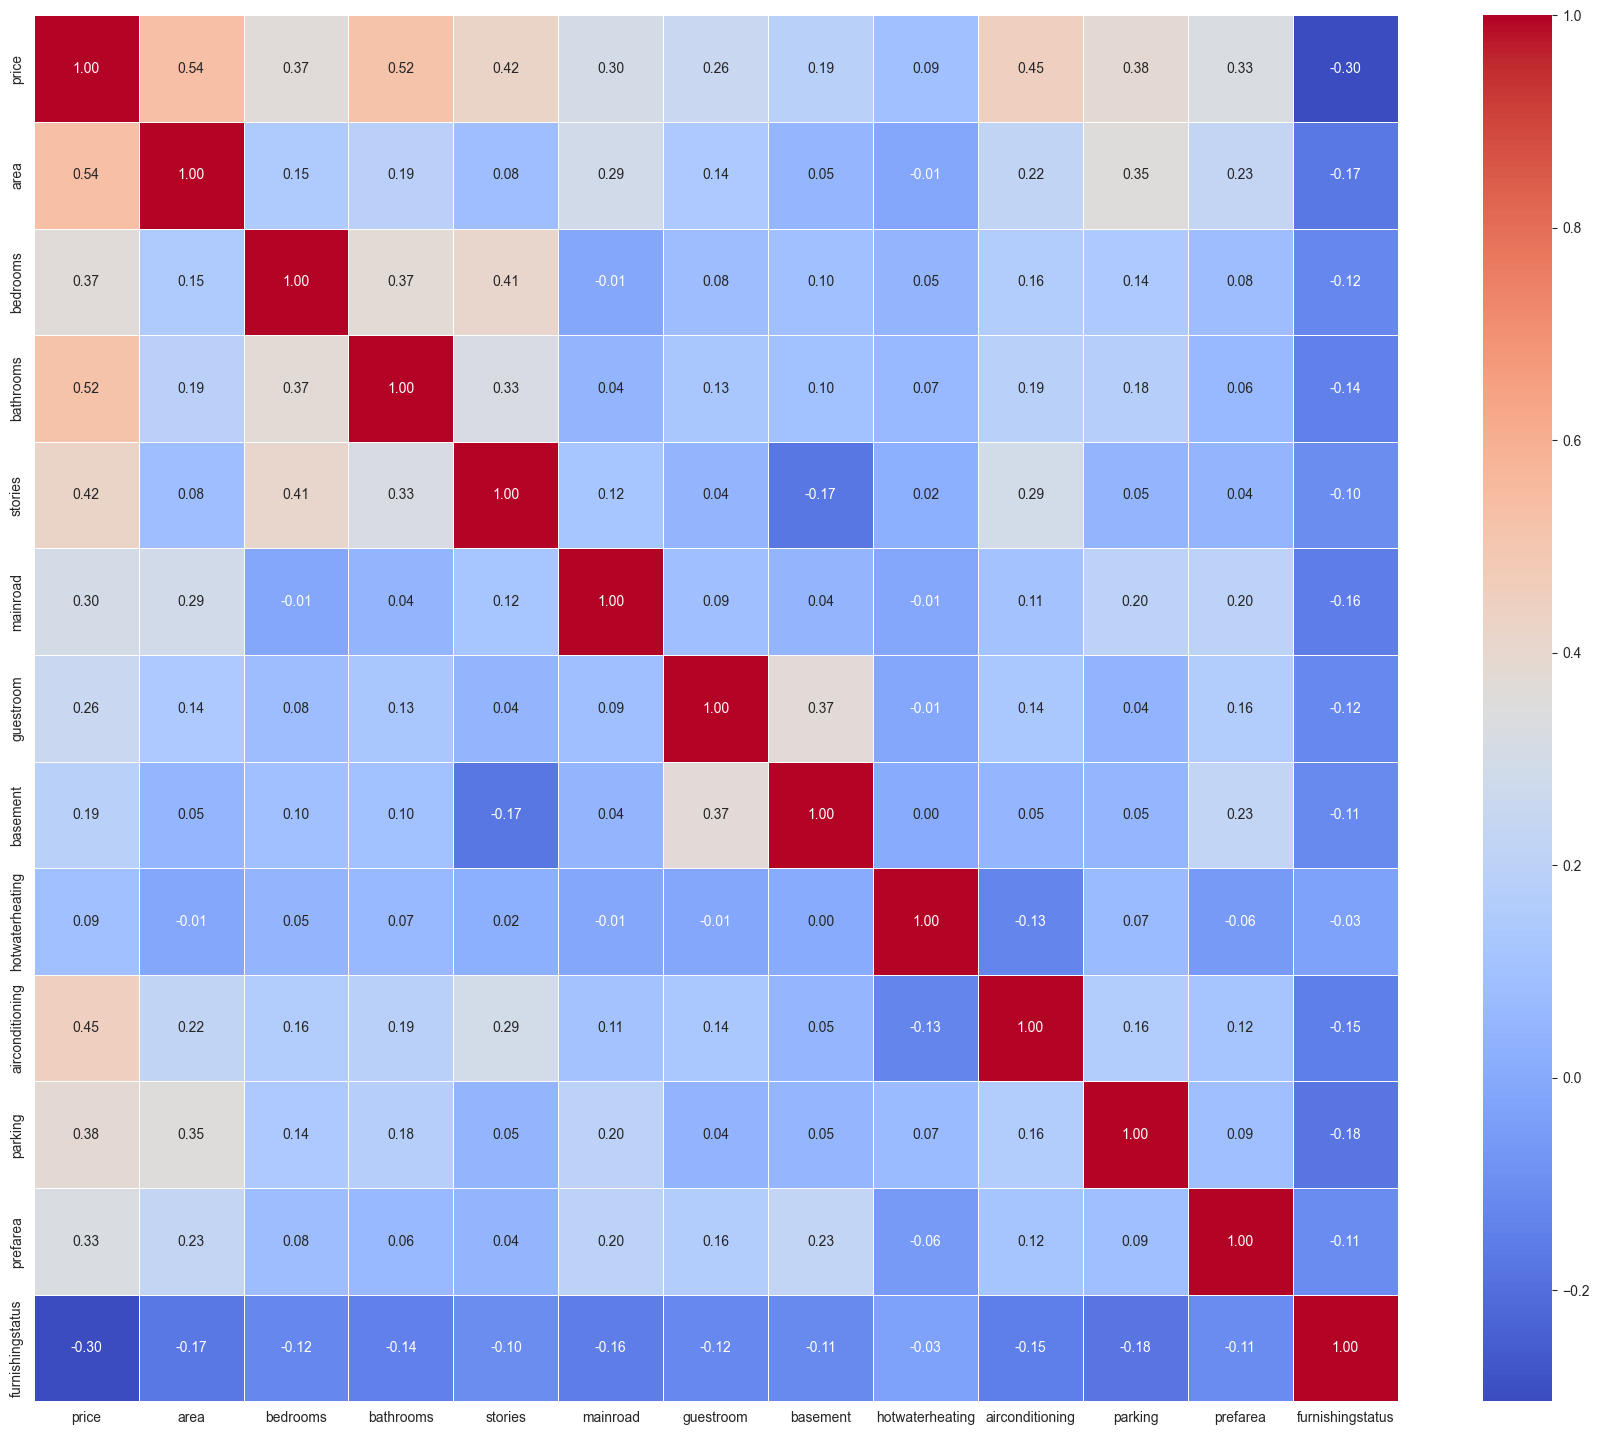

In [322]:
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [323]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [324]:
y=y.values.reshape(-1,1)

##### Exibe o DataFrame atualizado após o pré-processamento

In [325]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


### Normalizando as variáveis independentes (X) e dependente (y) para o intervalo [0, 1]

In [326]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [327]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


#### Dividindo os dados em conjuntos de treino (80%) e teste (20%) com embaralhamento

In [328]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

#### Definindo os modelos de regressão a serem avaliados

In [329]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
}

In [331]:
Name = ['Linear Regression','Random Forest']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse) # Erro quadrático médio
    print("Mean Absolute Error (MAE):", mae) # Erro absoluto médio
    print("R-squared Score:", r2) # Coeficiente de determinação (R²)
    print("score:",model.score(X_test,y_test))
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 0.013281243729270743
Mean Absolute Error (MAE): 0.08482075249315933
R-squared Score: 0.6494754192267793
score: 0.6494754192267793

Results for Random Forest:
Mean Squared Error (MSE): 0.014592693357614369
Mean Absolute Error (MAE): 0.08918371198220734
R-squared Score: 0.6148630485368856
score: 0.6148630485368856



/Users/hassanrodrigues/hassan/av_tec-housing-price-prediction/venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


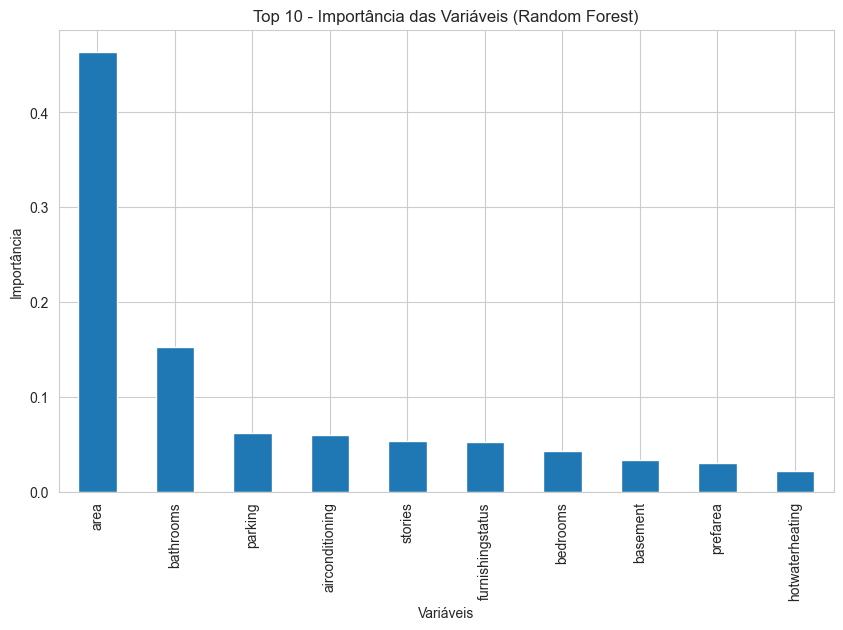

In [334]:
importances = model.feature_importances_
features = X.columns
forest_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
forest_importances[:10].plot(kind='bar')
plt.title("Top 10 - Importância das Variáveis (Random Forest)")
plt.ylabel("Importância")
plt.xlabel("Variáveis")
plt.show()